In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
artists = pd.read_csv('asset/artist_data.csv')
works = pd.read_csv('asset/artwork_data.csv')

C:\Users\micsa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#1 Who are the most popular artists in the Tate Collection? Are there any outliers in terms of amount collected?

Text(0,0.5,'Artworks Count')

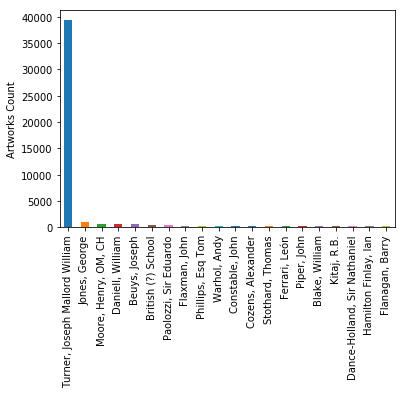

In [5]:
works.artist.value_counts().head(20).plot(kind='bar')
plt.ylabel('Artworks Count')

Text(0,0.5,'Artworks Count')

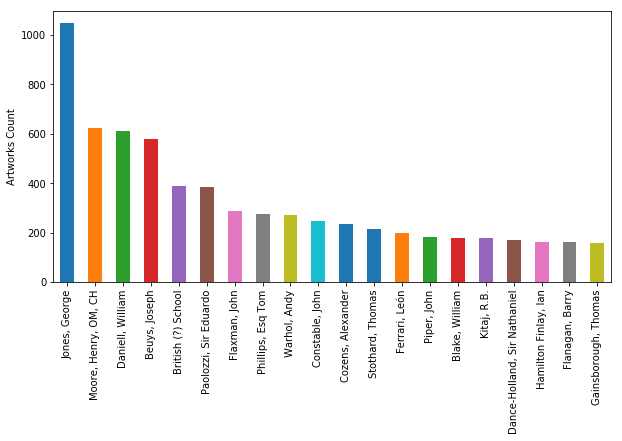

In [21]:
works.artist.value_counts().head(21)[1:].plot(kind='bar', figsize=(10,5))
plt.ylabel('Artworks Count')

#2 Who are the artists in the Tate collection? How does that vary by geography, age, and living or dead?

In [22]:
len(artists)

3532

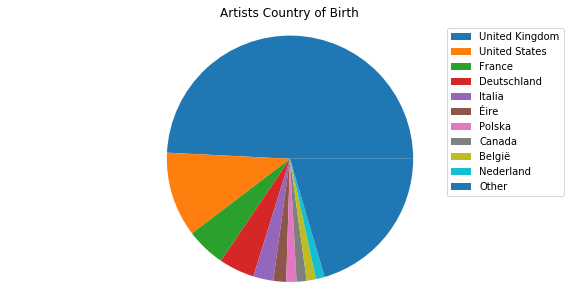

In [23]:
# Process data to create counts by country

# Split the place of birth on commas
locations = artists.placeOfBirth.str.split(',', 1).tolist()
locations = [x for x in locations if str(x) != 'nan']
countries = []

# Process countries and clean up text
for entry in locations:
    c = entry[-1]
    c = c.strip()
    countries.append(c)
countries = pd.DataFrame(countries, columns=['country'])

# Create numeric counts
cntry_counts = pd.DataFrame(countries.country.value_counts())
other = int(cntry_counts[10:].sum())
cntry_counts = cntry_counts[:10]
cntry_counts.loc[11] = other
cntry_counts = cntry_counts.rename(index={11: 'Other'})

# Generate Pie Chart
plt.figure(figsize=(10, 5))
plt.pie(cntry_counts.country)
plt.axis('equal')
plt.title('Artists Country of Birth')
plt.legend(cntry_counts.index)

Text(0.5,1,'Artists Born by Year')

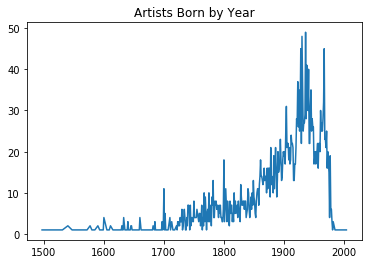

In [12]:
plt.plot(artists.yearOfBirth.value_counts().sort_index())
plt.title('Artists Born by Year')

Text(0,0.5,'Works Acquired')

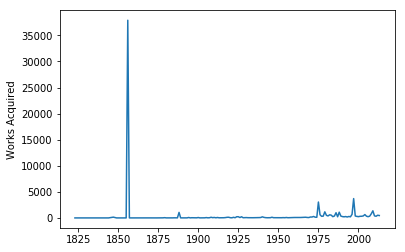

In [13]:
acquisition_df = pd.DataFrame(works.acquisitionYear.value_counts())
acquisition_df = acquisition_df.sort_index()
plt.plot(acquisition_df)
plt.ylabel('Works Acquired')

Text(0,0.5,'Works Acquired')

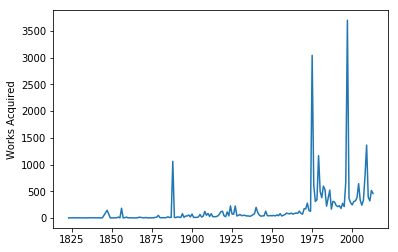

In [14]:
acquisition_df = pd.DataFrame(works[works.artist != 'Turner, Joseph Mallord William'].acquisitionYear.value_counts())
acquisition_df = acquisition_df.sort_index()
plt.plot(acquisition_df)
plt.ylabel('Works Acquired')

Text(0.5,1,'Artists Who are No Long Living')

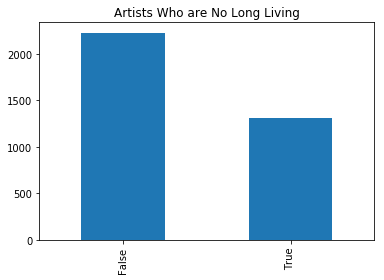

In [17]:
living = pd.DataFrame(artists.yearOfDeath.isnull())
living = pd.DataFrame(living.yearOfDeath.value_counts())
living.plot(kind='bar', legend=False)
plt.title('Artists Who are No Long Living')

#3 What are the most popular mediums and how does medium affect size?

In [18]:
works.medium.value_counts().head(10)

Graphite on paper                            26167
Oil paint on canvas                           3383
Screenprint on paper                          2984
Lithograph on paper                           2721
Watercolour on paper                          1890
Etching on paper                              1793
Graphite and watercolour on paper             1680
Ink on paper                                   880
Intaglio print on paper                        820
Photograph, gelatin silver print on paper      750
Name: medium, dtype: int64

In [19]:
# Remove Turner
turnerless_artworks = works[works['artist'] != 'Turner, Joseph Mallord William']
# Coerce to Numeric
turnerless_artworks.height = pd.to_numeric(turnerless_artworks.height, errors = 'coerce')
turnerless_artworks.width = pd.to_numeric(turnerless_artworks.width, errors = 'coerce')
turnerless_artworks.depth = pd.to_numeric(turnerless_artworks.depth, errors = 'coerce')
turnerless_artworks = turnerless_artworks[turnerless_artworks['units']=='mm']
turnerless_artworks = turnerless_artworks[turnerless_artworks.height.notnull()]
## The error is just because of how we did the conditional select and we don't need to be worried about it...

C:\Users\micsa\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [20]:
# Aggregate to new medium_agg column
turnerless_artworks['medium_agg'] = 'other'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("paper", na=False),'medium_agg'] = 'paper'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("canvas", na=False),'medium_agg'] = 'canvas'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("wood", na=False),'medium_agg'] = 'wood'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("paint on", na=False),'medium_agg'] = 'other painted panel'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Bronze", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Plaster", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Marble", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Stone", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("plate", na=False),'medium_agg'] = 'plate'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("photograph", na=False),'medium_agg'] = 'photo'

turnerless_artworks['surface'] = turnerless_artworks.height * turnerless_artworks.width

In [21]:
turnerless_artworks[['medium_agg','height','width','depth','surface']].groupby('medium_agg').describe()

depth                                                 \
                     count         mean          std   min     25%    50%   
medium_agg                                                                  
canvas                83.0   134.957831   355.563519   5.5   27.50   35.0   
other                953.0   761.288772  1448.336740   3.0  125.00  300.0   
other painted panel  442.0    76.997738   290.694723   2.0   20.00   30.0   
paper                160.0   277.478125   695.113346   1.0   28.25   45.0   
photo                 32.0   215.968750   467.421236  18.0   25.00   39.5   
plate                  8.0  1997.625000  4215.212448  25.0   75.00  585.5   
sculpture            620.0   406.875806   504.036311   8.0  152.00  270.0   
wood                 208.0   548.336538   923.748764   6.0   91.50  260.0   

                                        height                ...     \
                         75%      max    count         mean   ...      
medium_agg                                                    ...      
canvas                 53.00   2185.0    260.0  1776.396154   ...      
other                 750.00  18290.0   1301.0  1189.179554   ...      
other painted panel    55.00   5486.0   4408.0  1032.772913   ...      
paper                 184.00   5000.0  19800.0   417.212288   ...      
photo                 146.50   2015.0    192.0  1286.786458   ...      
plate                1107.75  12360.0    344.0   347.148256   ...      
sculpture             445.00   5800.0    639.0   619.608764   ...      
wood                  510.00   6300.0    349.0  1067.189112   ...      

                       surface                 width               \
                           75%          max    count         mean   
medium_agg                                                          
canvas               4707935.5   21731950.0    259.0  1495.119691   
other                1597850.0   91253940.0   1298.0   960.942604   
other painted panel  1558060.5   36233100.0   4408.0   960.962568   
paper                 315810.0   32376000.0  19780.0   407.575925   
photo                1696120.0   54315000.0    190.0   973.368421   
plate                  69845.0    6549000.0    344.0   264.523256   
sculpture             662296.5   17964018.0    639.0   765.388106   
wood                 1247400.0  132462000.0    349.0  1065.908309   

                                                                          
                             std    min    25%     50%      75%      max  
medium_agg                                                                
canvas                890.336830  120.0  727.5  1410.0  2135.00   4860.0  
other                1019.110727    5.0  290.0   603.0  1314.75  10900.0  
other painted panel   639.367519   50.0  508.0   762.0  1244.25   4580.0  
paper                 326.287752    3.0  190.0   320.0   543.25   8454.0  
photo                 962.547810  100.0  380.0   608.0  1202.75   4892.0  
plate                 210.308546  102.0  229.0   229.0   229.00   2235.0  
sculpture             657.149556   19.0  304.0   533.0  1029.00   3750.0  
wood                 1145.166249   35.0  400.0   756.0  1310.00  11960.0  

[8 rows x 32 columns]

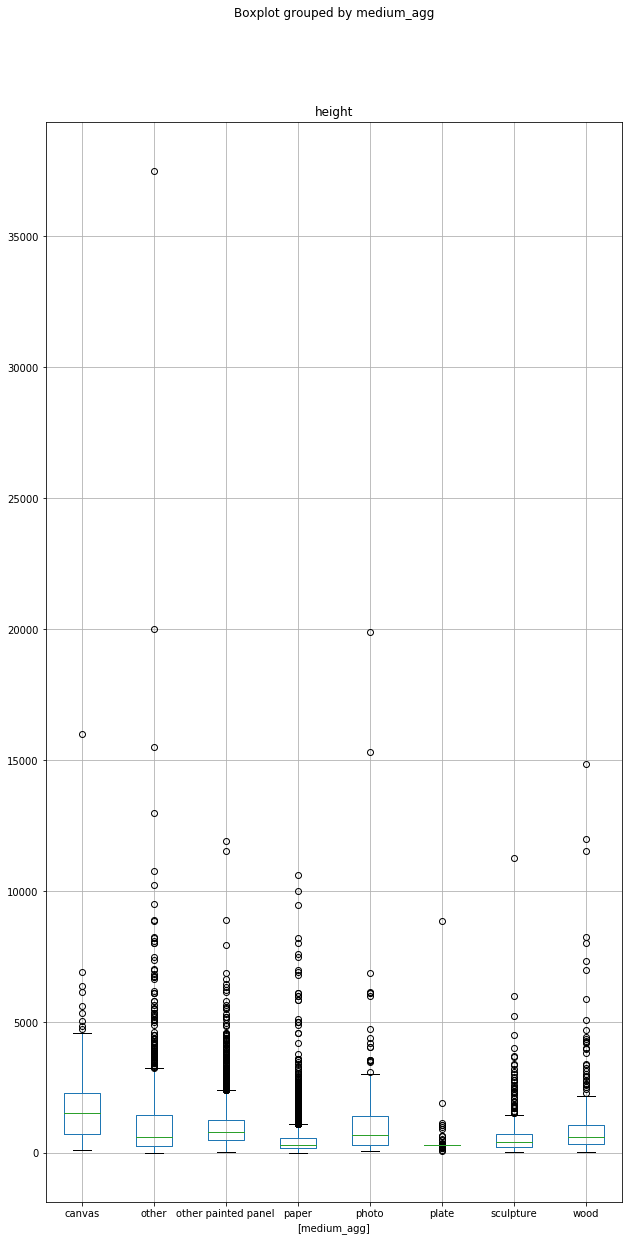

In [22]:
turnerless_artworks[['medium_agg', 'height']].boxplot(by='medium_agg', figsize=(10,20))

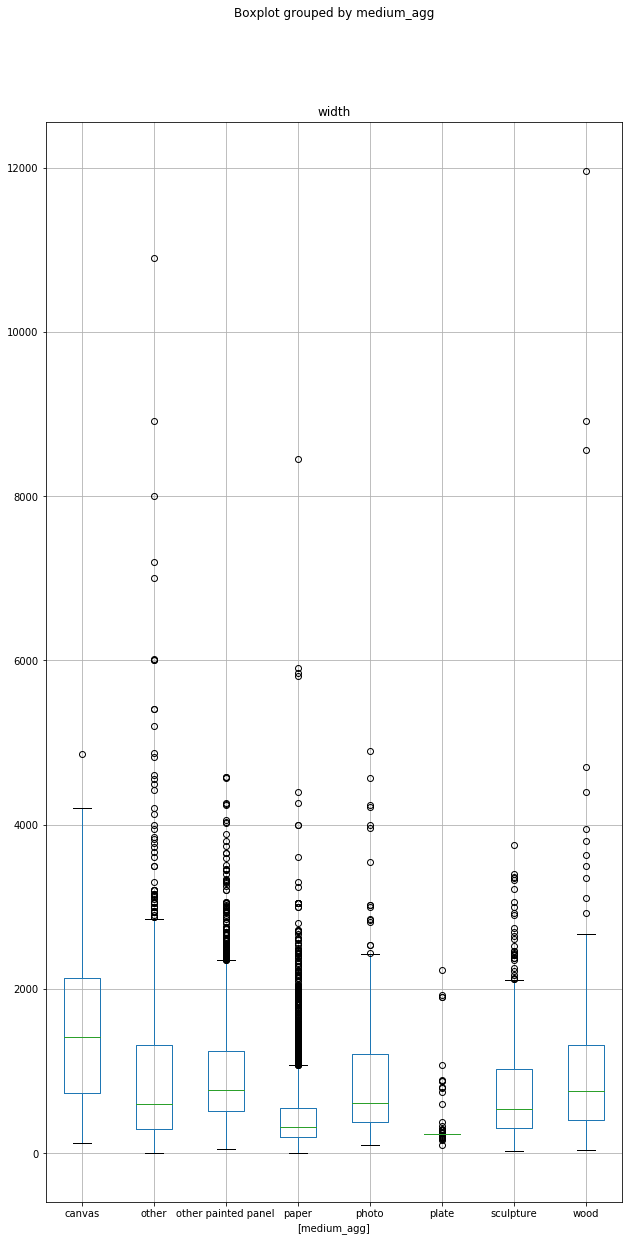

In [23]:
turnerless_artworks[['medium_agg', 'width']].boxplot(by='medium_agg', figsize=(10,20))

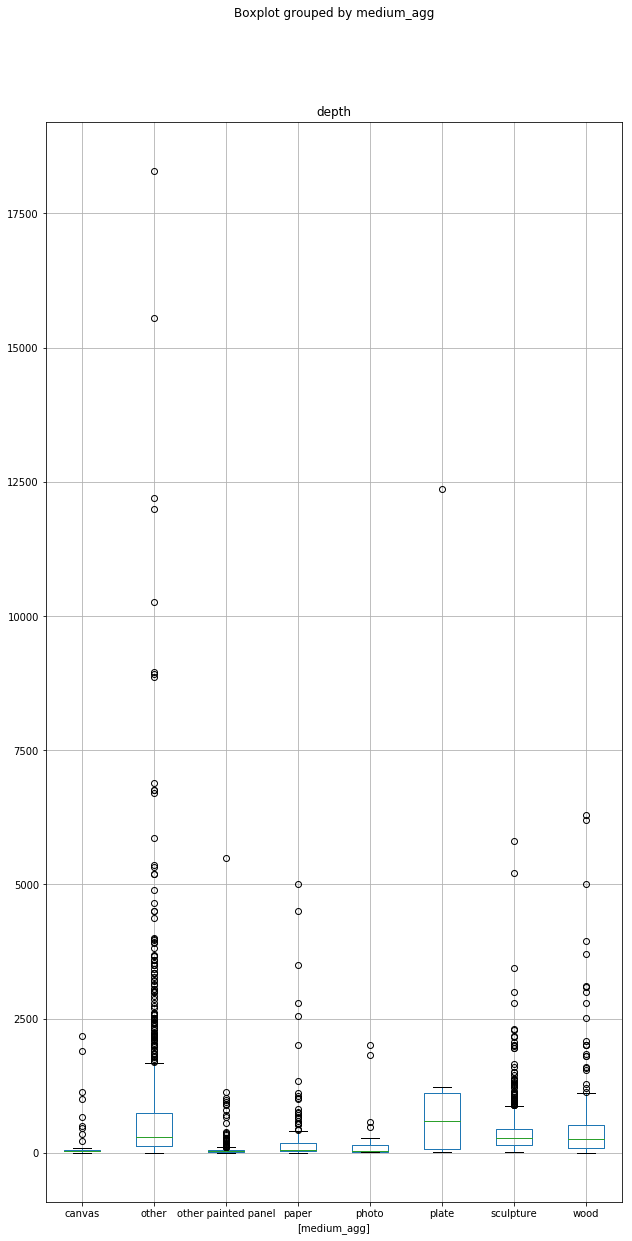

In [24]:
turnerless_artworks[['medium_agg', 'depth']].boxplot(by='medium_agg', figsize=(10,20))